In [10]:
import anndata
from sklearn.manifold import TSNE
import plotnine as p
import scvi
import torch

In [2]:
print("CUDA Version:", torch.version.cuda)

CUDA Version: 12.1


In [3]:

adata = anndata.io.read_h5ad(
    '/teamspace/studios/scratch-studio/data/AIDA Phase 1 Freeze 1/250310.sampled.h5ad'
)
    
adata


AnnData object with n_obs × n_vars = 103811 × 36161
    obs: 'mapped_reference_assembly', 'alignment_software', 'library_uuid', 'assay_ontology_term_id', 'library_starting_quantity', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'sample_uuid', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'donor_BMI_at_collection', 'suspension_derivation_process', 'suspension_enriched_cell_types', 'suspension_percent_cell_viability', 'suspension_uuid', 'suspension_type', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'Country', 'nCount_RNA', 'nFeature_RNA', 'Ethnicity_Selfreported', 'TCR_VDJdb', 'TCRa_V_gene', 'TCRa_D_gene', 'TCRa_J_gene', 'TCRa_C_gene', 'TCRb_V_gene', 'TCRb_D_gene', 'TCRb_J_gene', 'TCRb_C_gene', 'TCR_Clonality', 'TCR_Clone_ID', 'BCR_VDJ_V_call', 'BCR_VDJ_D_call', 'BCR_VDJ_J_call', 'BCR_VDJ_

In [4]:
scvi.external.MRVI.setup_anndata(adata, sample_key = 'donor_id')

In [5]:
model = scvi.external.MRVI(adata)

In [6]:
model.train(max_epochs = 20)

INFO     Jax module moved to cuda:0.Note: Pytorch lightning will show GPU is not being used for the Trainer.       


GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Training:   0%|          | 0/20 [00:00<?, ?it/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:369: You have overridden `transfer_batch_to_device` in `LightningModule` but have passed in a `LightningDataModule`. It will use the implementation from `LightningModule` instance.
`Trainer.fit` stopped: `max_epochs=20` reached.


In [8]:
adata.obsm['u'] = model.get_latent_representation(give_z = False)

100%|██████████| 812/812 [00:10<00:00, 74.04it/s] 


In [9]:
adata.obsm['z'] = model.get_latent_representation(give_z = True)

100%|██████████| 812/812 [00:08<00:00, 95.36it/s] 


In [11]:
adata.obsm['u_tsne'] = TSNE().fit_transform(adata.obsm['u'])

In [12]:
adata.obs['u_tsne_1'] = adata.obsm['u_tsne'][:, 0]
adata.obs['u_tsne_2'] = adata.obsm['u_tsne'][:, 1]

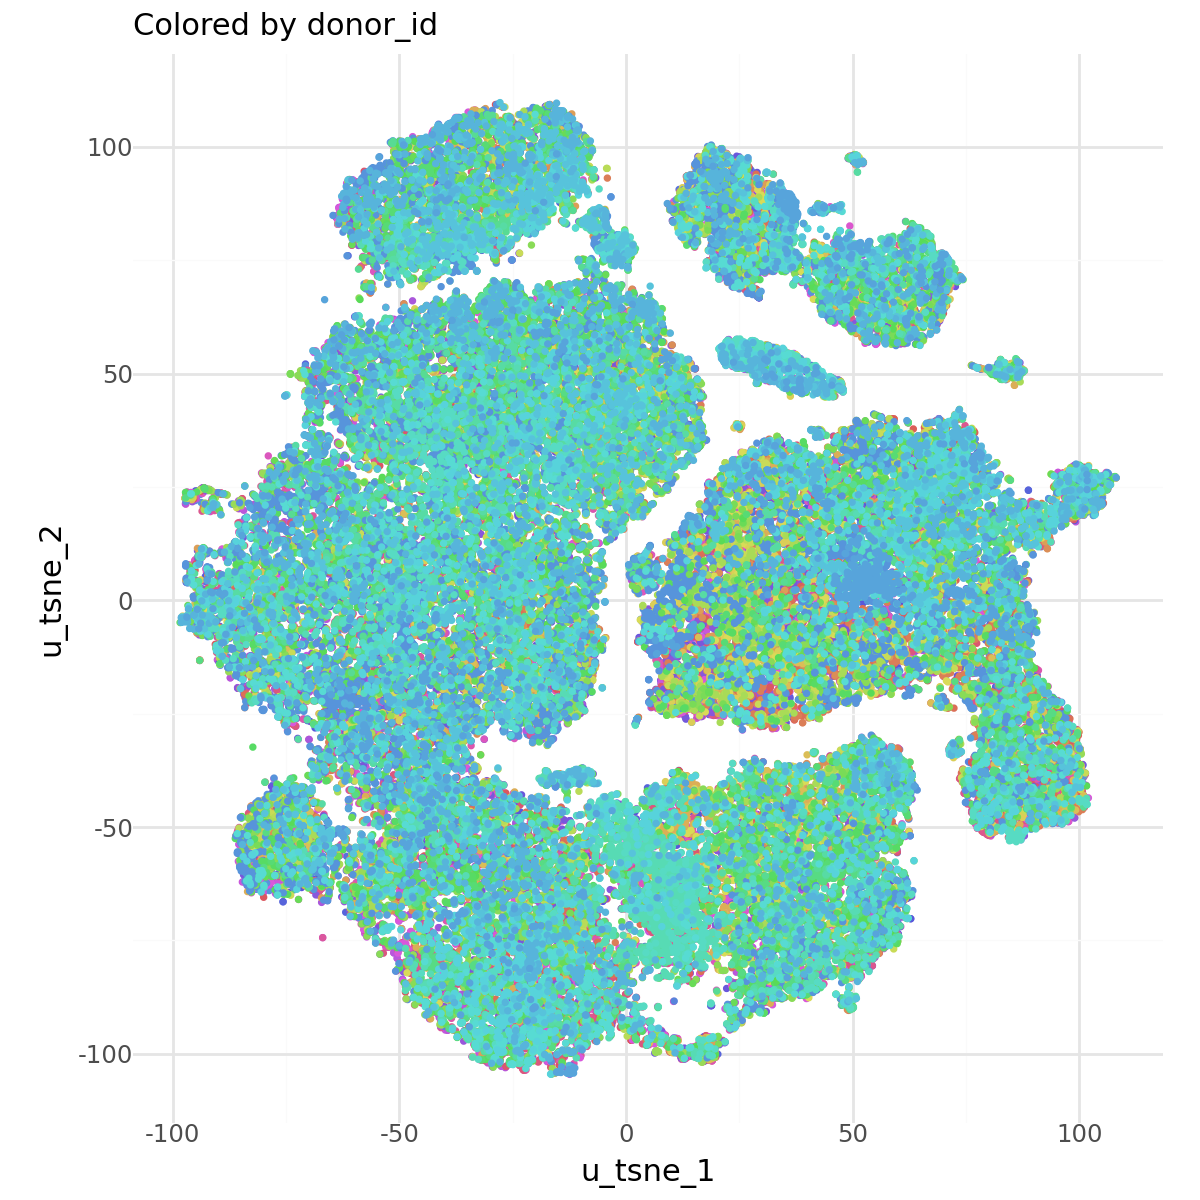

In [21]:
color_by = 'donor_id'
(
    p.ggplot(p.aes(x = 'u_tsne_1', y = 'u_tsne_2', color = color_by), model.adata.obs)
    + p.geom_point(shape = '.')
    + p.coord_equal()
    + p.theme_minimal()
    + p.theme(figure_size = (6, 6), legend_position = 'none')
    + p.labs(subtitle = f'Colored by {color_by}')
)

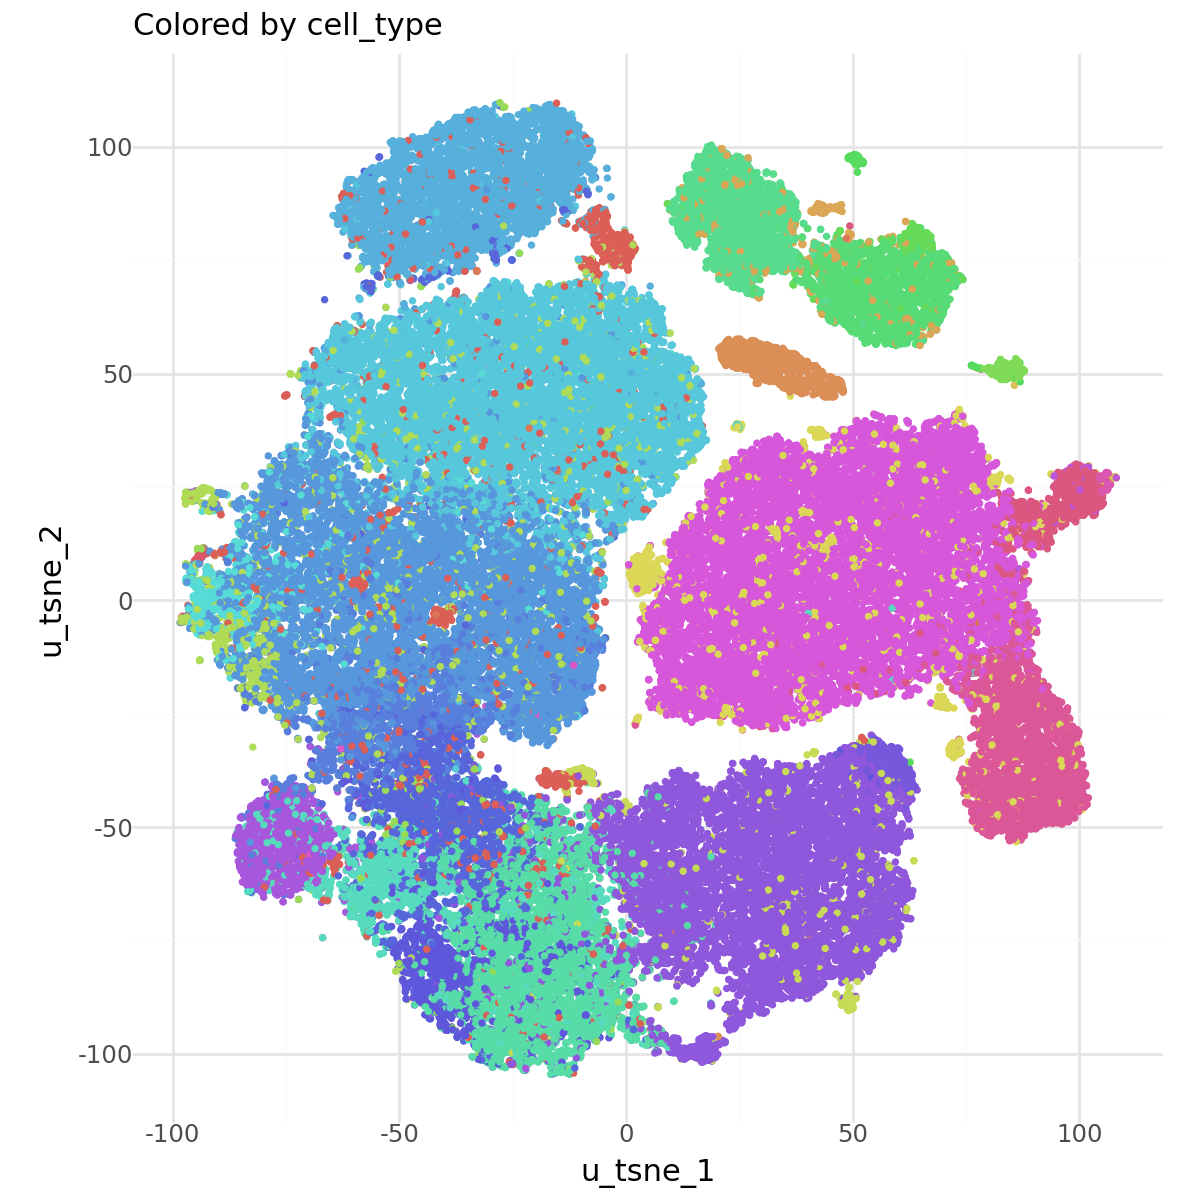

In [22]:
color_by = 'cell_type'
(
    p.ggplot(p.aes(x = 'u_tsne_1', y = 'u_tsne_2', color = color_by), model.adata.obs)
    + p.geom_point(shape = '.')
    + p.coord_equal()
    + p.theme_minimal()
    + p.theme(figure_size = (6, 6), legend_position = 'none')
    + p.labs(subtitle = f'Colored by {color_by}')
)


In [15]:
adata.obsm['z_tsne'] = TSNE().fit_transform(adata.obsm['z'])

In [17]:
adata.obs['z_tsne_1'] = adata.obsm['z_tsne'][:, 0]
adata.obs['z_tsne_2'] = adata.obsm['z_tsne'][:, 1]

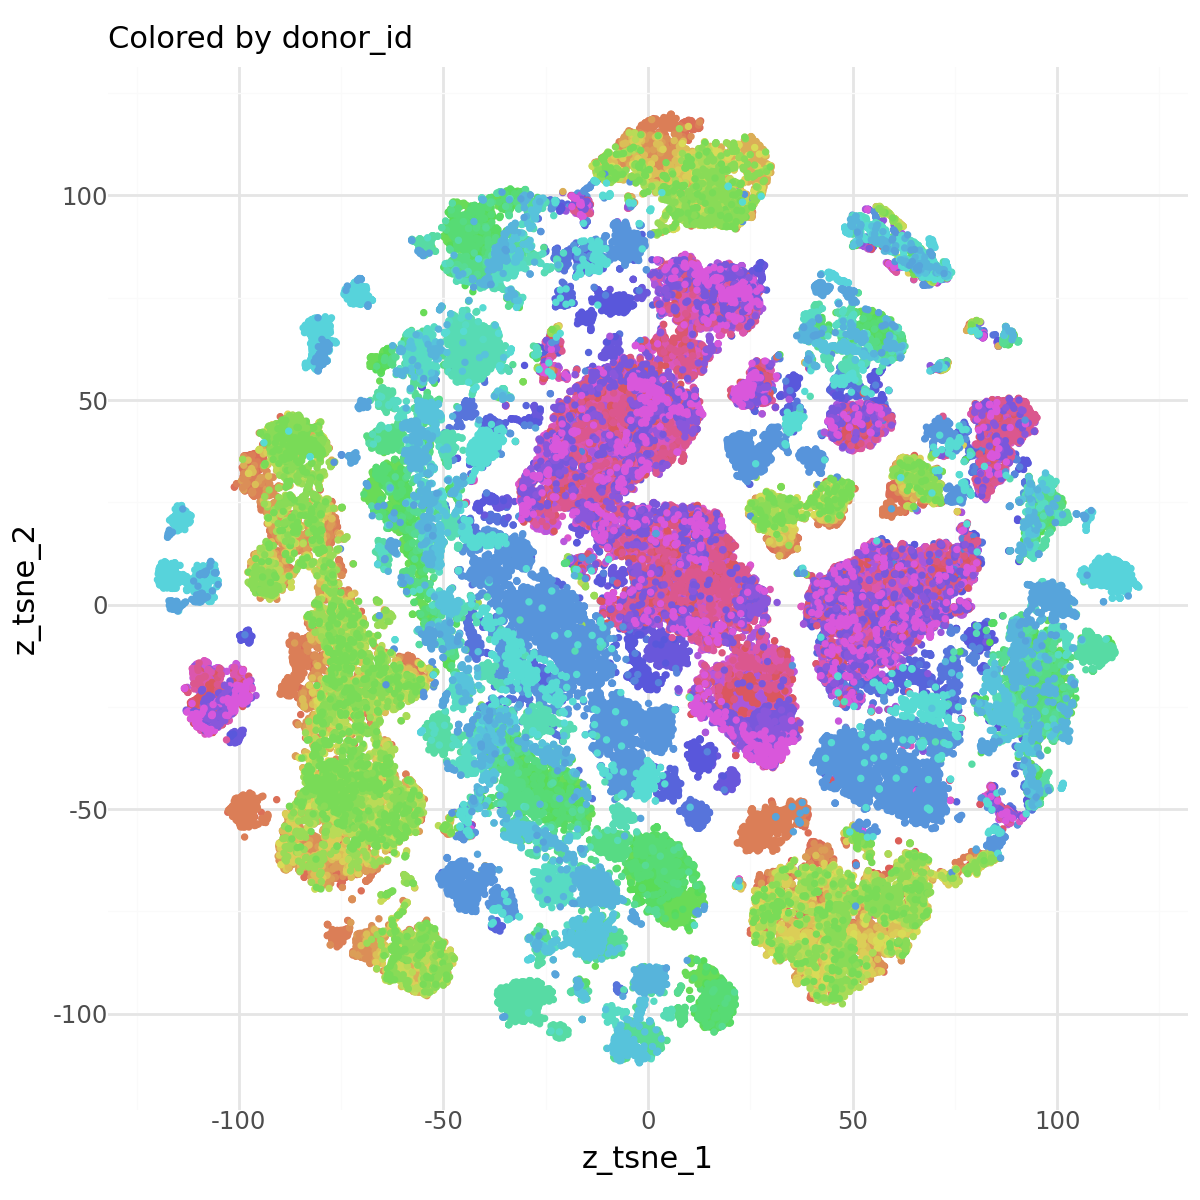

In [23]:
color_by = 'donor_id'
(
    p.ggplot(p.aes(x = 'z_tsne_1', y = 'z_tsne_2', color = color_by), model.adata.obs)
    + p.geom_point(shape = '.')
    + p.coord_equal()
    + p.theme_minimal()
    + p.theme(figure_size = (6, 6), legend_position = 'none')
    + p.labs(subtitle = f'Colored by {color_by}')
)

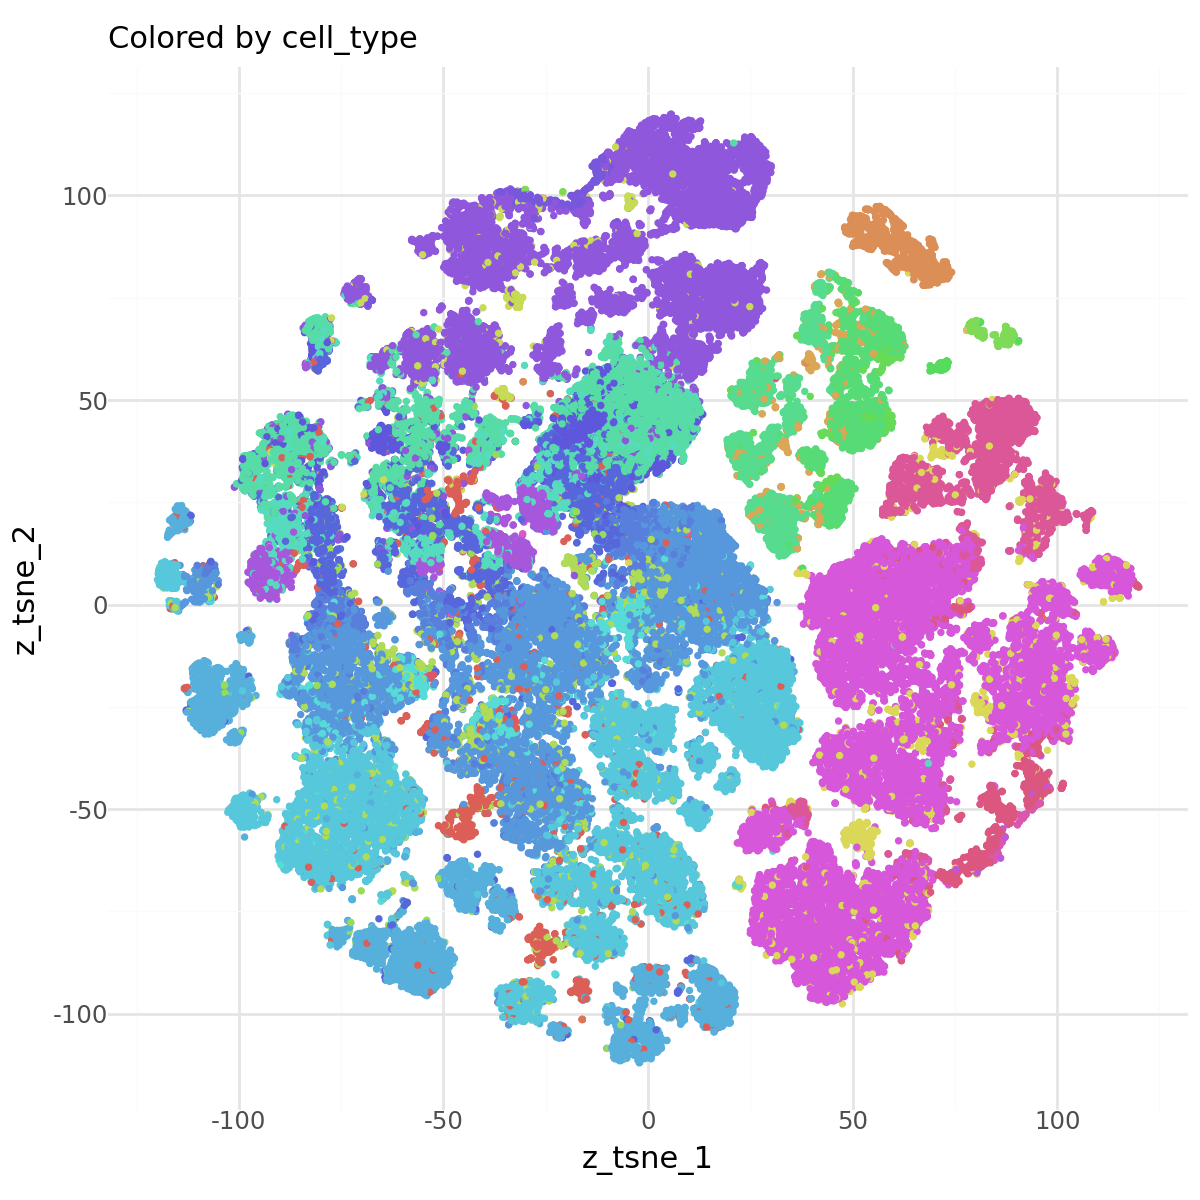

In [24]:
color_by = 'cell_type'
(
    p.ggplot(p.aes(x = 'z_tsne_1', y = 'z_tsne_2', color = color_by), model.adata.obs)
    + p.geom_point(shape = '.')
    + p.coord_equal()
    + p.theme_minimal()
    + p.theme(figure_size = (6, 6), legend_position = 'none')
    + p.labs(subtitle = f'Colored by {color_by}')
)

In [25]:
model.save(
    '/teamspace/studios/this_studio/data/250313.model.mrVI'
)